In [16]:
import pandas as pd
import numpy as np
import os
import sys
import json
import re
import time
import pathlib
from pathlib import Path
import janitor
from janitor import clean_names


In [108]:
# Set current_dir to the directory of the notebook
current_dir = Path().resolve()  # This will get the current working directory

data_path = current_dir.parent / 'data' / 'modules.xlsx'

# import and clean energy consumption data
company_total_ec_df = pd.read_excel(data_path, sheet_name='Company Total Electricity Use', skiprows=1)
company_total_ec_df = company_total_ec_df.clean_names()
company_total_ec_df.rename(columns={'company': 'company_name'}, inplace=True)
company_total_ec_df = company_total_ec_df[['company_name', 'reported_data_year']]
company_total_ec_df = company_total_ec_df.dropna(subset=['reported_data_year']) # remove rows with no data

dc_ec_df = pd.read_excel(data_path, sheet_name='Data Center Electricity Use ', skiprows=1)
dc_ec_df = dc_ec_df.clean_names()
dc_ec_df = dc_ec_df[['company_name', 'reported_data_year']]

dc_fuel_df = pd.read_excel(data_path, sheet_name='Data Center Fuel Use ', skiprows=1)
dc_fuel_df = dc_fuel_df.clean_names()
dc_fuel_df = dc_fuel_df[['company_name', 'reported_data_year']]

dc_water_df = pd.read_excel(data_path, sheet_name='Data Center Water Use ', skiprows=1)
dc_water_df = dc_water_df.clean_names()
dc_water_df = dc_water_df[['company_name', 'reported_data_year']]

# add a reporting_scope column to each DataFrame
company_total_ec_df.loc[:, 'reporting_scope'] = 'Company Wide Electricity Use'
dc_ec_df.loc[:, 'reporting_scope'] = 'Data Center Electricity Use'
dc_fuel_df.loc[:, 'reporting_scope'] = 'Data Center Fuel Use'
dc_water_df.loc[:, 'reporting_scope'] = 'Data Center Water Use'

# combine all the dfs into one - maintaining the original columns
reporting_df = pd.concat([company_total_ec_df, dc_ec_df, dc_fuel_df, dc_water_df], axis=0)
reporting_df['reported_data_year'] = reporting_df['reported_data_year'].astype(int)

reporting_df['reported_data_year']

# Group by reported_data_year and reporting_scope, counting unique companies
filteredreporting_df = reporting_df.groupby(['reported_data_year', 'reporting_scope'])['company_name'].nunique().reset_index()

# Rename the count column for clarity
reporting_df.rename(columns={'company_name': 'num_companies'}, inplace=True)


In [111]:
reporting_df[(reporting_df['reported_data_year']==2022)&
                    (reporting_df['reporting_scope']=='Company Wide Electricity Use')] #.count()

,reported_data_year,reporting_scope,num_companies
58,2022,Company Wide Electricity Use,27


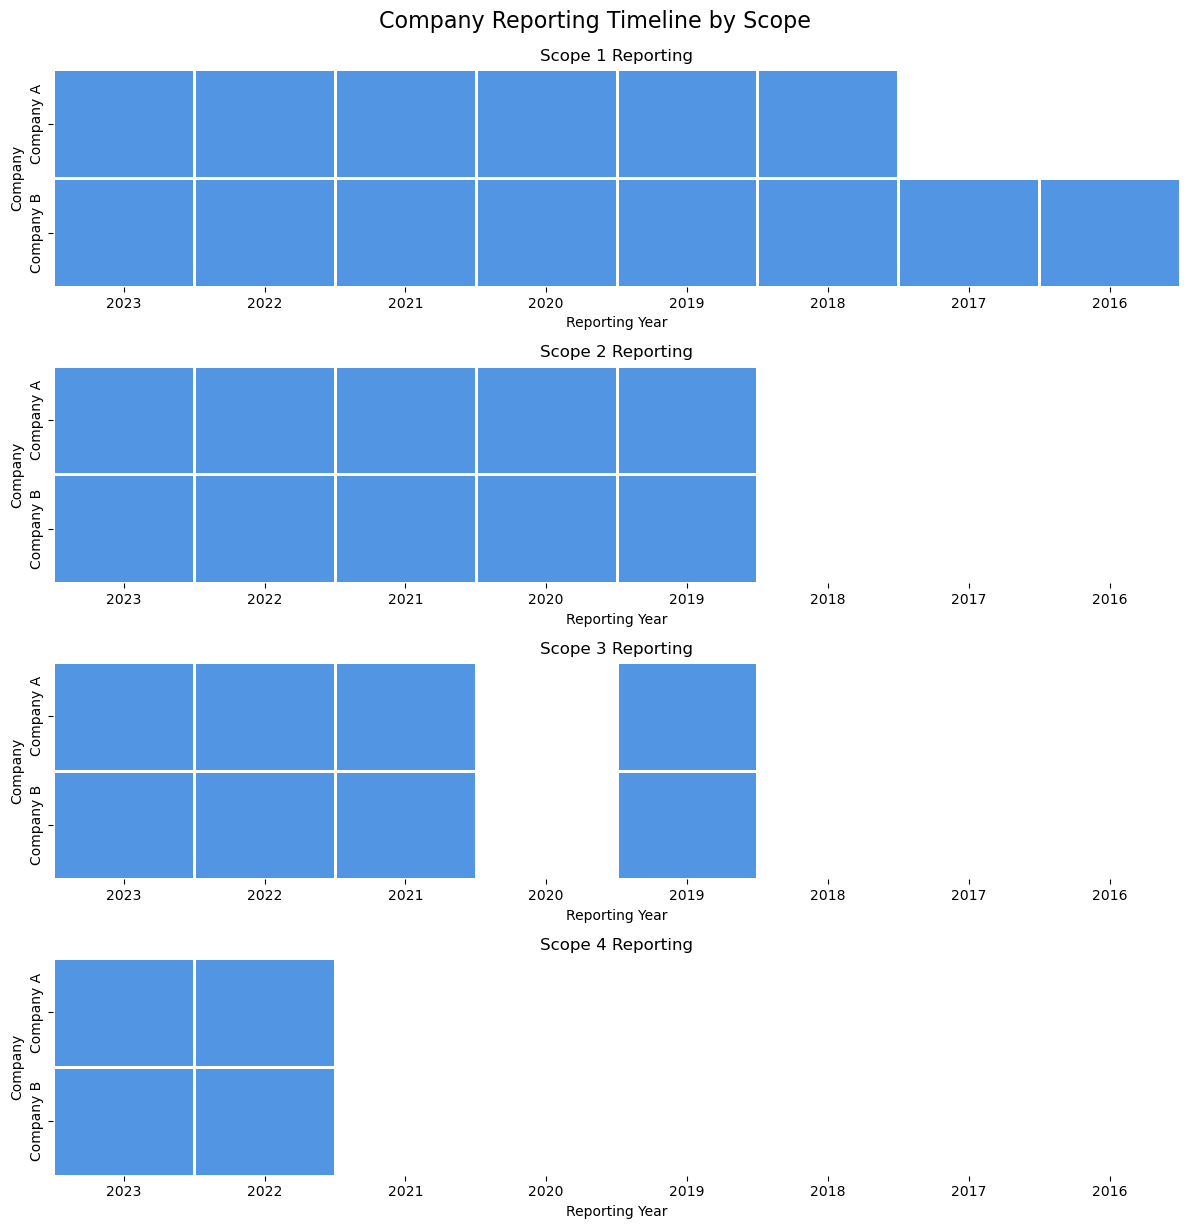

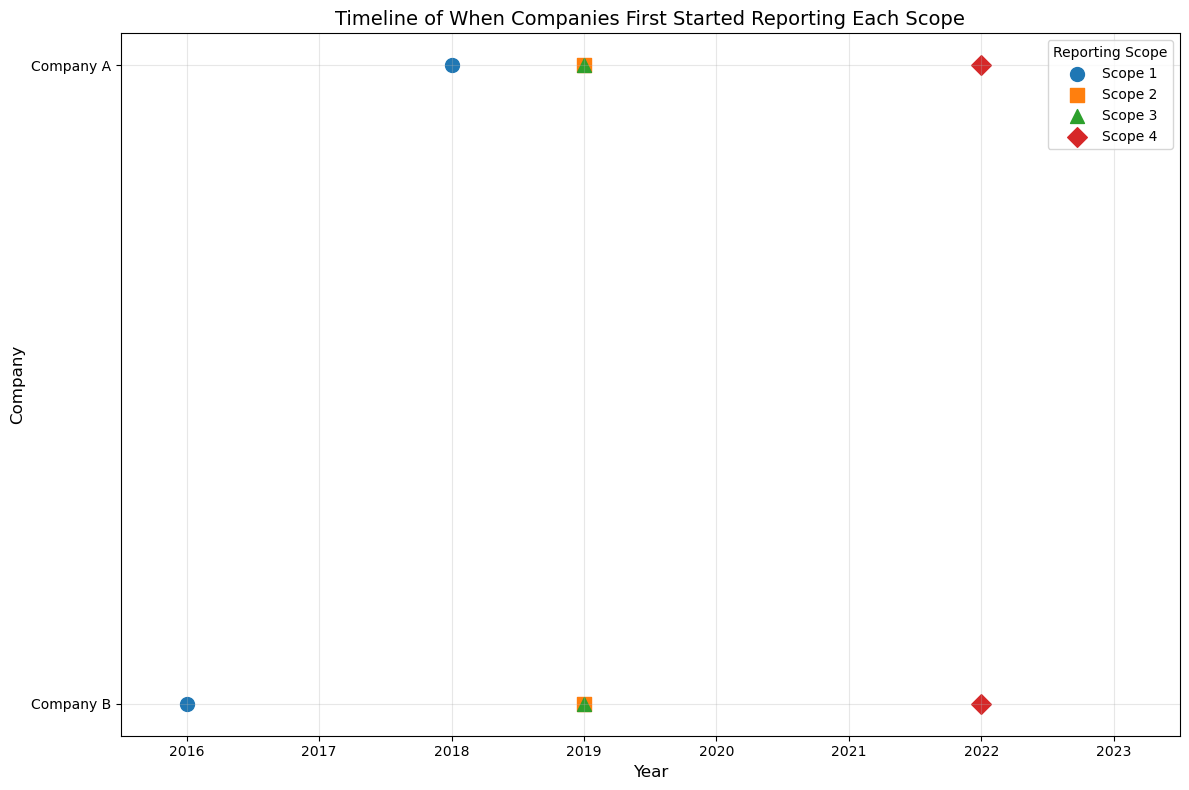

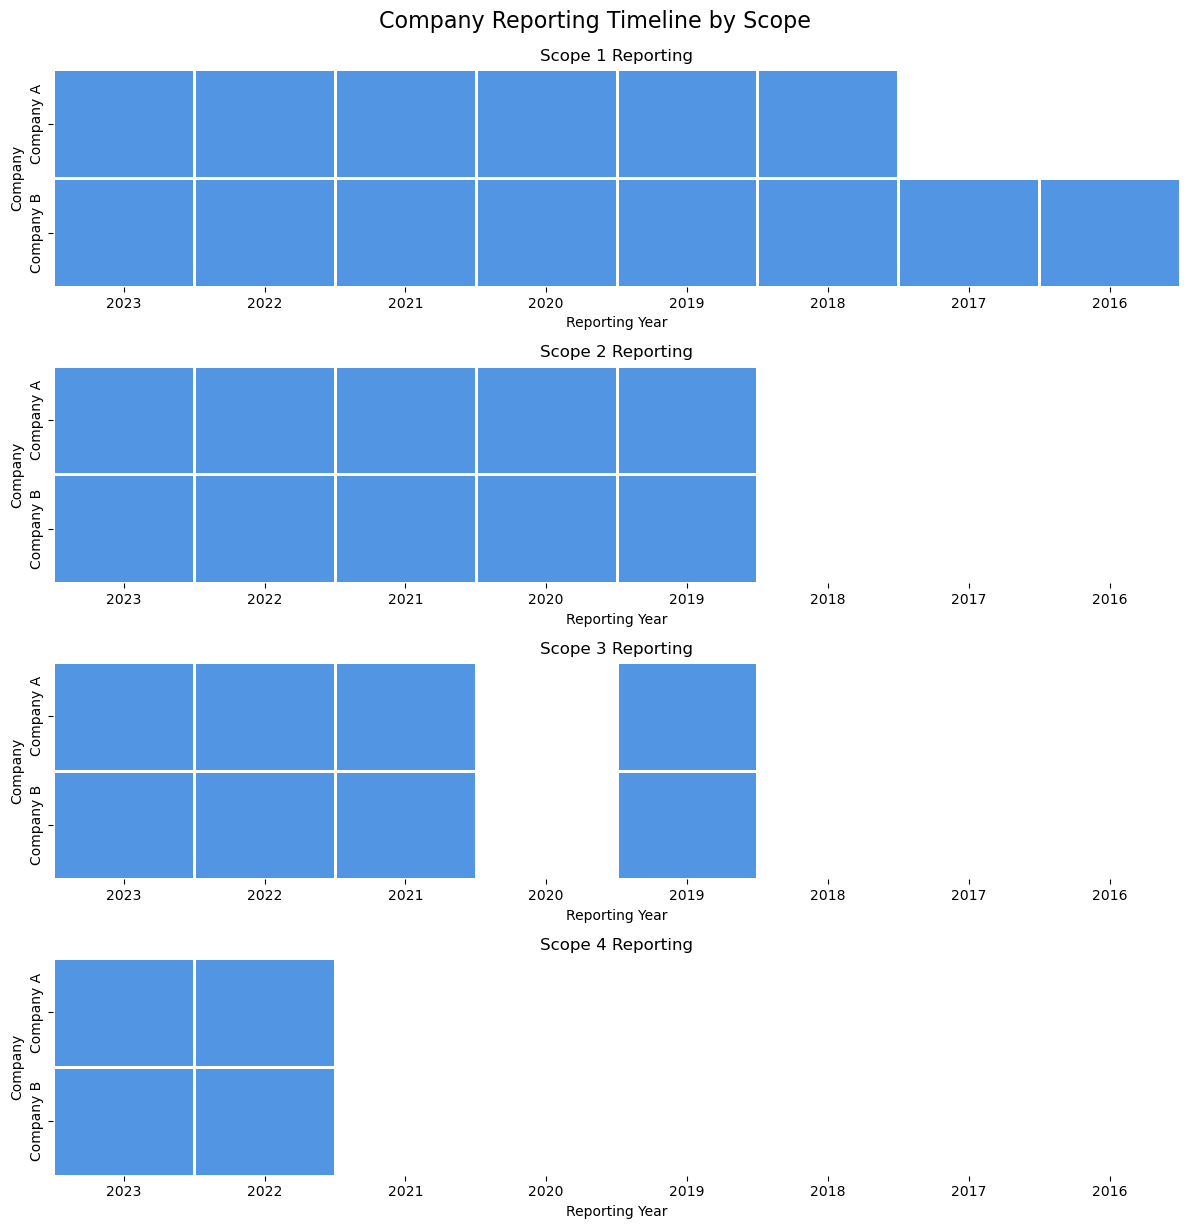

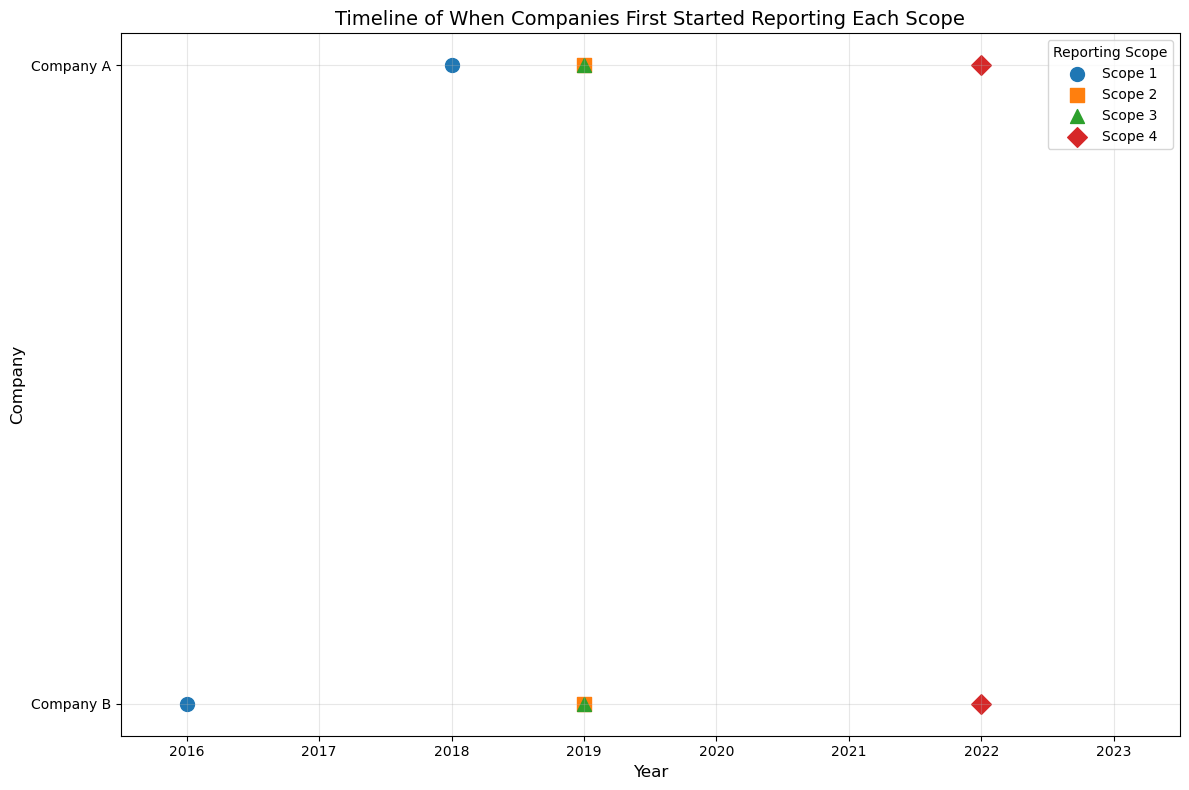

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create example dataframe from your data
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2020, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2020, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2019, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2019, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2019, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2018, "Reporting Scope": "Scope 1"},
    # Company B
    {"Company": "Company B", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company B", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company B", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company B", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company B", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company B", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company B", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company B", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
    {"Company": "Company B", "Reporting Year": 2020, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2020, "Reporting Scope": "Scope 2"},
    {"Company": "Company B", "Reporting Year": 2019, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2019, "Reporting Scope": "Scope 2"},
    {"Company": "Company B", "Reporting Year": 2019, "Reporting Scope": "Scope 3"},
    {"Company": "Company B", "Reporting Year": 2018, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2017, "Reporting Scope": "Scope 1"},
    {"Company": "Company B", "Reporting Year": 2016, "Reporting Scope": "Scope 1"},
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Method 1: Heatmap Visualization
def create_reporting_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique(), reverse=True)
    scopes = sorted(df['Reporting Scope'].unique())
    
    # Create pivot table for each scope
    fig, axes = plt.subplots(len(scopes), 1, figsize=(12, 3*len(scopes)))
    
    if len(scopes) == 1:
        axes = [axes]
    
    for i, scope in enumerate(scopes):
        # Filter for the current scope
        scope_df = df[df['Reporting Scope'] == scope]
        
        # Create a pivot table (1 if reported, 0 if not)
        pivot = pd.pivot_table(
            scope_df, 
            values='Reporting Year', 
            index=['Company'], 
            columns=['Reporting Year'], 
            aggfunc=lambda x: 1,
            fill_value=0
        )
        
        # Make sure all years are represented
        for year in years:
            if year not in pivot.columns:
                pivot[year] = 0
        
        pivot = pivot[sorted(pivot.columns, reverse=True)]
        
        # Generate the heatmap
        sns.heatmap(
            pivot, 
            cmap=['white', '#5295E3'],
            cbar=False,
            linewidths=1,
            ax=axes[i]
        )
        
        axes[i].set_title(f"{scope} Reporting")
        axes[i].set_xlabel("Reporting Year")
        axes[i].set_ylabel("Company")
    
    plt.tight_layout()
    plt.suptitle("Company Reporting Timeline by Scope", y=1.02, fontsize=16)
    return fig

# Method 2: Timeline Visualization
def create_reporting_timeline(df):
    # Process data to find first reporting year for each company and scope
    first_reports = df.groupby(['Company', 'Reporting Scope'])['Reporting Year'].min().reset_index()
    first_reports = first_reports.pivot(index='Company', columns='Reporting Scope', values='Reporting Year')
    
    # Sort companies by their earliest reporting year
    first_reports['earliest'] = first_reports.min(axis=1)
    first_reports = first_reports.sort_values('earliest')
    first_reports = first_reports.drop('earliest', axis=1)
    
    # Get unique scopes for our plot
    scopes = [col for col in first_reports.columns if 'Scope' in col]
    
    # Create the visualization
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    marker_styles = ['o', 's', '^', 'D', 'X']
    
    # Plot each scope with different colors
    for i, scope in enumerate(scopes):
        # Skip companies that don't have this scope
        valid_companies = first_reports[first_reports[scope].notna()]
        
        ax.scatter(
            valid_companies[scope], 
            valid_companies.index,
            label=scope,
            color=colors[i % len(colors)],
            marker=marker_styles[i % len(marker_styles)],
            s=100
        )
    
    # Set plot properties
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Company', fontsize=12)
    ax.set_title('Timeline of When Companies First Started Reporting Each Scope', fontsize=14)
    ax.legend(title='Reporting Scope')
    
    # Set x-axis limits with some padding
    years = df['Reporting Year'].unique()
    ax.set_xlim(min(years) - 0.5, max(years) + 0.5)
    
    # Ensure x-axis shows all years
    ax.set_xticks(sorted(years))
    
    plt.tight_layout()
    return fig

# Create and display both visualizations
heatmap_fig = create_reporting_heatmap(df)
timeline_fig = create_reporting_timeline(df)

# save the figures or display them
# heatmap_fig.savefig('reporting_heatmap.png', dpi=300, bbox_inches='tight')
# timeline_fig.savefig('reporting_timeline.png', dpi=300, bbox_inches='tight')


# display(heatmap_fig)
# display(timeline_fig)

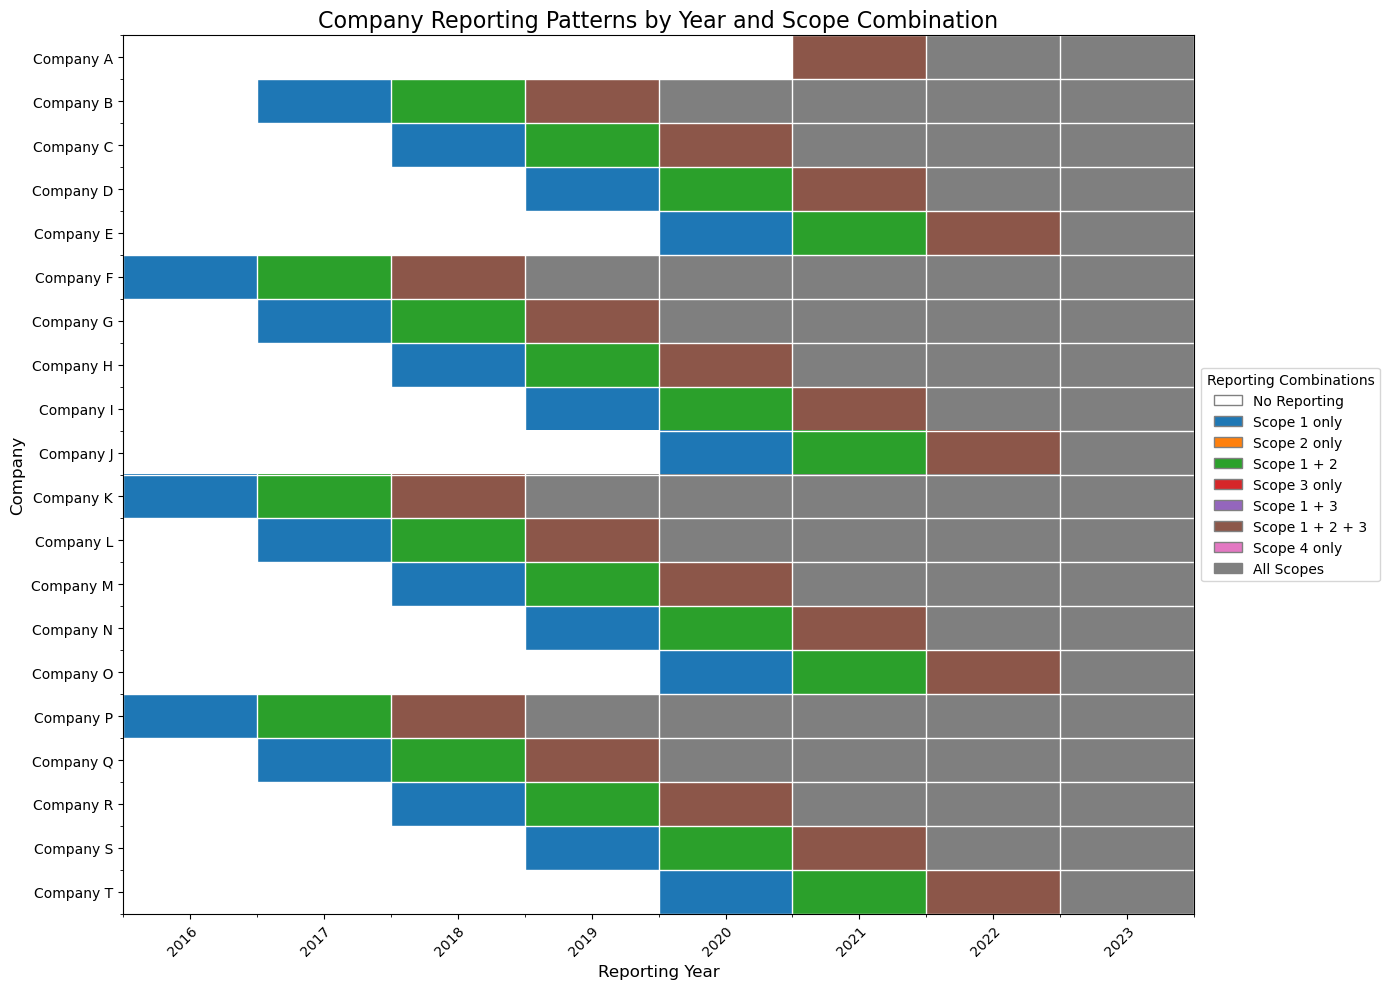

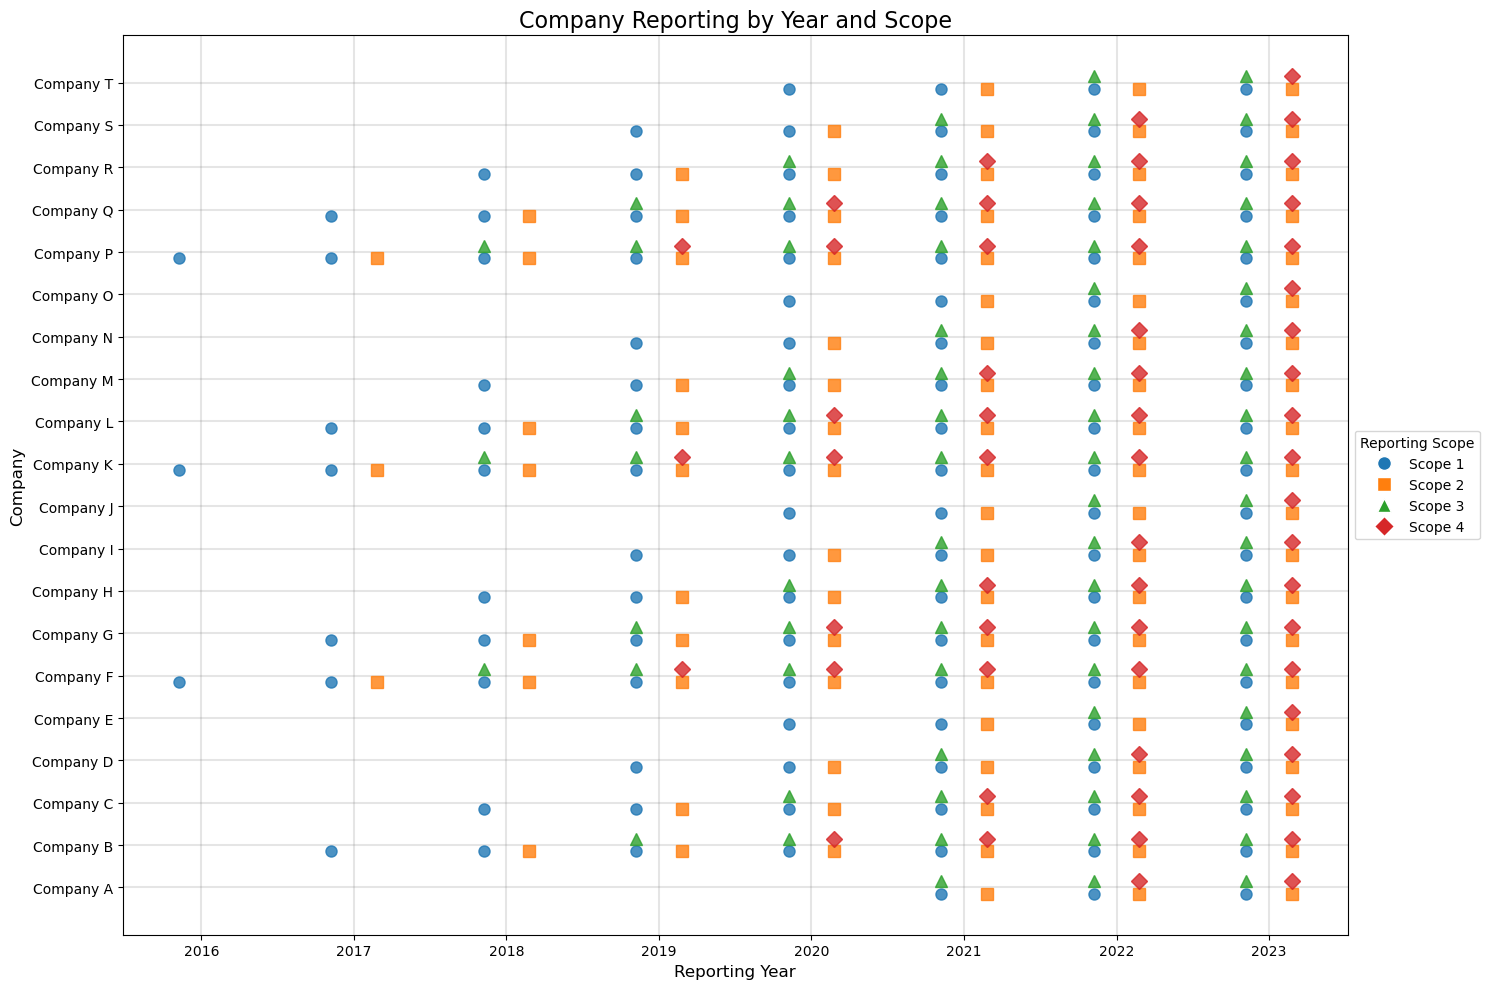

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Create example dataframe
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
]

# Add more company data
# Adding 19 more companies for demonstration
for i in range(1, 20):
    company_name = f"Company {chr(65+i)}"  # B through T
    start_year = 2016 + (i % 5)  # Different starting years
    
    for year in range(start_year, 2024):
        # Different scope combinations based on year
        scopes = []
        if year >= start_year:
            scopes.append("Scope 1")
        if year >= start_year + 1:
            scopes.append("Scope 2")
        if year >= start_year + 2:
            scopes.append("Scope 3")
        if year >= start_year + 3:
            scopes.append("Scope 4")
            
        # Add entries for this company-year-scope combination
        for scope in scopes:
            data.append({"Company": company_name, "Reporting Year": year, "Reporting Scope": scope})

# Convert to DataFrame
df = pd.DataFrame(data)

def create_scope_combination_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Create a numeric matrix to hold the scope combinations for each company and year
    numeric_matrix = np.zeros((len(companies), len(years)), dtype=int)
    
    # For each company and year, determine which scopes are reported
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            
            # Create a binary representation of the scopes
            # e.g., 1 + 2 + 4 = 7 would represent Scope 1 + Scope 2 + Scope 4
            scope_value = sum(2**(i) for i, scope in enumerate(all_scopes) if scope in reported_scopes)
            numeric_matrix[c_idx, y_idx] = scope_value
    
    # Create a custom colormap
    # We'll define specific colors for the most common combinations
    # and interpolate for the rest
    n_combinations = 2**len(all_scopes)
    
    # Define colors for important combinations
    colors = []
    colors.append((1, 1, 1))  # No scopes (white)
    colors.append((0.12, 0.47, 0.71))  # Scope 1 only (blue)
    colors.append((1.0, 0.5, 0.05))  # Scope 2 only (orange)
    colors.append((0.17, 0.63, 0.17))  # Scope 1+2 (green)
    colors.append((0.84, 0.15, 0.16))  # Scope 3 only (red)
    colors.append((0.58, 0.4, 0.74))  # Scope 1+3 (purple)
    colors.append((0.55, 0.34, 0.29))  # Scope 1+2+3 (brown)
    colors.append((0.89, 0.47, 0.76))  # Scope 4 only (pink)
    colors.append((0.5, 0.5, 0.5))  # All scopes (gray)
    
    # Create a mapping for each scope combination to a color
    color_map = {
        0: 0,  # No scopes
        1: 1,  # Scope 1 only
        2: 2,  # Scope 2 only
        3: 3,  # Scope 1+2
        4: 4,  # Scope 3 only
        5: 5,  # Scope 1+3
        7: 6,  # Scope 1+2+3
        8: 7,  # Scope 4 only
        15: 8  # All scopes
    }
    
    # Create a new matrix with mapped color indices
    color_indices = np.zeros_like(numeric_matrix)
    for c_idx in range(len(companies)):
        for y_idx in range(len(years)):
            scope_value = numeric_matrix[c_idx, y_idx]
            color_indices[c_idx, y_idx] = color_map.get(scope_value, 0)
    
    # Create the custom colormap
    cmap = ListedColormap(colors)
    
    # Create the figure
    plt.figure(figsize=(14, 10))
    
    # Create the heatmap
    ax = plt.gca()
    im = ax.imshow(color_indices, cmap=cmap, aspect='auto')
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(years)))
    ax.set_yticks(np.arange(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Rotate the x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add gridlines
    ax.set_xticks(np.arange(-.5, len(years), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(companies), 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    
    # Create a legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=colors[0], edgecolor='gray', label='No Reporting'),
        Patch(facecolor=colors[1], edgecolor='gray', label='Scope 1 only'),
        Patch(facecolor=colors[2], edgecolor='gray', label='Scope 2 only'),
        Patch(facecolor=colors[3], edgecolor='gray', label='Scope 1 + 2'),
        Patch(facecolor=colors[4], edgecolor='gray', label='Scope 3 only'),
        Patch(facecolor=colors[5], edgecolor='gray', label='Scope 1 + 3'),
        Patch(facecolor=colors[6], edgecolor='gray', label='Scope 1 + 2 + 3'),
        Patch(facecolor=colors[7], edgecolor='gray', label='Scope 4 only'),
        Patch(facecolor=colors[8], edgecolor='gray', label='All Scopes')
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Combinations", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    plt.title('Company Reporting Patterns by Year and Scope Combination', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    plt.tight_layout()
    return plt.gcf()

# Alternative visualization: Use filled markers for each scope
def create_scope_markers_chart(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Create a matrix to track which scopes are reported
    scope_matrix = {}
    for company in companies:
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            scope_matrix[(company, year)] = reported_scopes
    
    # Create a figure with two subplots
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Define markers and colors for each scope
    markers = ['o', 's', '^', 'D']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Define positions
    x_positions = np.arange(len(years))
    y_positions = np.arange(len(companies))
    
    # Plot a grid
    for y in range(len(companies)):
        ax.axhline(y=y, color='gray', linestyle='-', alpha=0.2)
    
    for x in range(len(years)):
        ax.axvline(x=x, color='gray', linestyle='-', alpha=0.2)
    
    # Slightly offset markers for visibility
    offsets = [(-0.15, -0.15), (0.15, -0.15), (-0.15, 0.15), (0.15, 0.15)]
    
    # Plot scope indicators
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            reported_scopes = scope_matrix[(company, year)]
            
            # For each reported scope, add a marker
            for s_idx, scope in enumerate(all_scopes):
                if scope in reported_scopes:
                    offset_x, offset_y = offsets[s_idx]
                    ax.plot(y_idx + offset_x, c_idx + offset_y, 
                           markers[s_idx], color=colors[s_idx], 
                           markersize=8, alpha=0.8)
    
    # Create a legend for the scopes
    legend_elements = [
        plt.Line2D([0], [0], marker=markers[i], color='w', 
                  label=scope, markersize=10, markerfacecolor=colors[i])
        for i, scope in enumerate(all_scopes)
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Scope", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Set ticks and labels
    ax.set_xticks(x_positions)
    ax.set_yticks(y_positions)
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Set labels and title
    plt.title('Company Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    plt.tight_layout()
    return plt.gcf()

# Create and display both visualizations
heatmap_fig = create_scope_combination_heatmap(df)
marker_fig = create_scope_markers_chart(df)

# To save
# heatmap_fig.savefig('scope_heatmap.png', dpi=300, bbox_inches='tight')
# marker_fig.savefig('scope_markers.png', dpi=300, bbox_inches='tight')

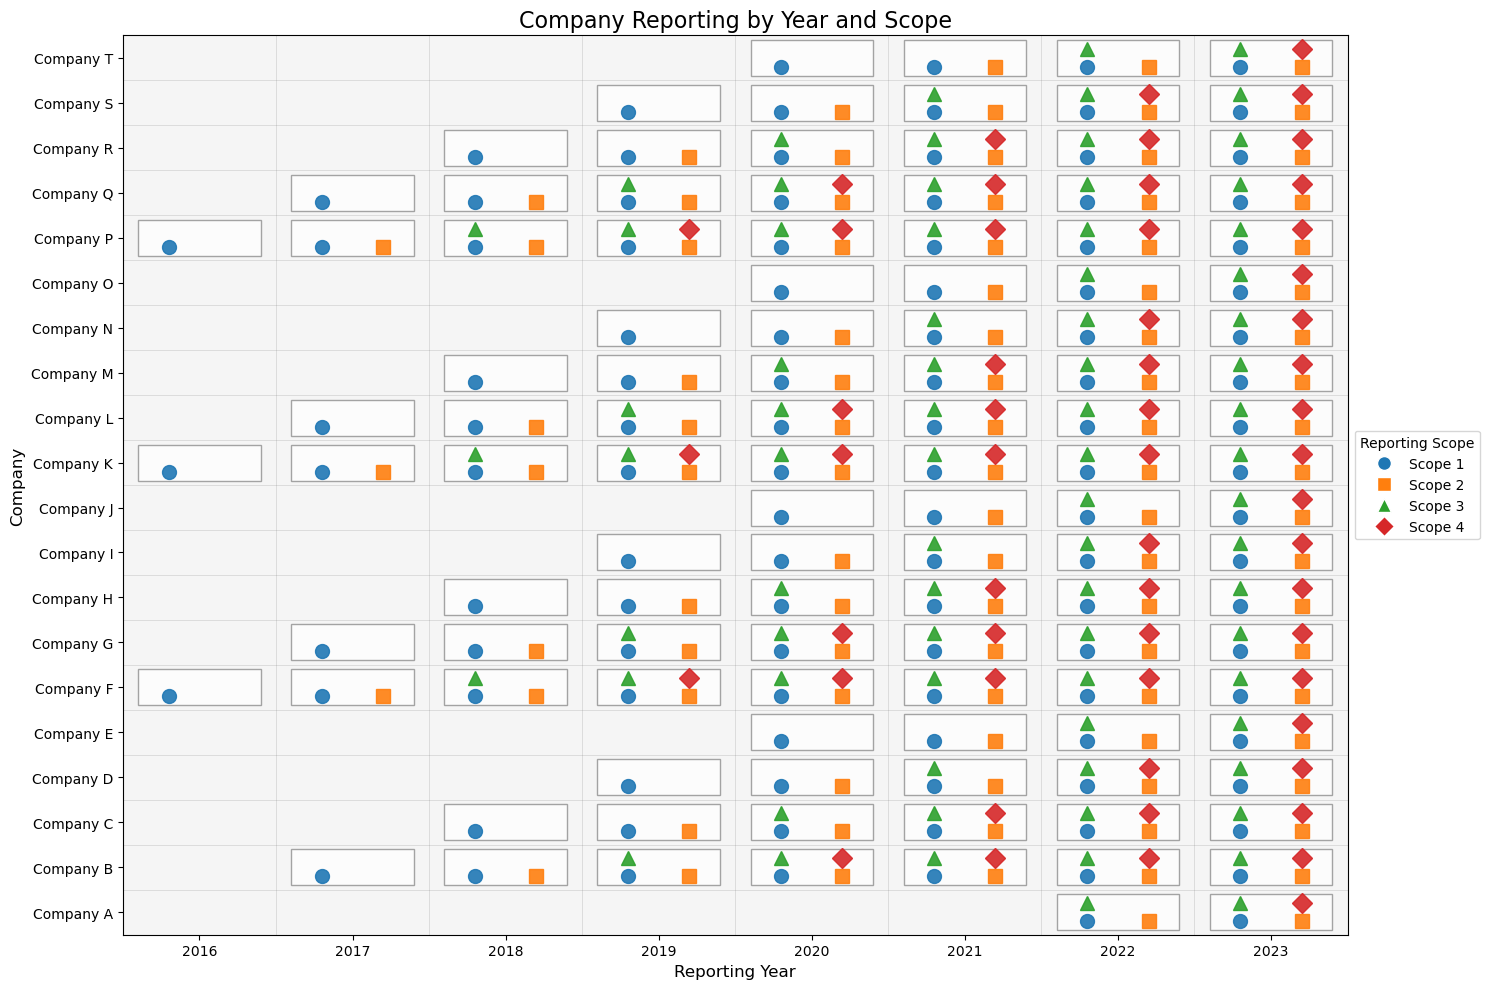

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create example dataframe
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
]

# Add more company data
# Adding several more companies for demonstration
for i in range(1, 20):
    company_name = f"Company {chr(65+i)}"  # B through T
    start_year = 2016 + (i % 5)  # Different starting years
    
    for year in range(start_year, 2024):
        # Different scope combinations based on year
        scopes = []
        if year >= start_year:
            scopes.append("Scope 1")
        if year >= start_year + 1:
            scopes.append("Scope 2")
        if year >= start_year + 2:
            scopes.append("Scope 3")
        if year >= start_year + 3:
            scopes.append("Scope 4")
            
        # Add entries for this company-year-scope combination
        for scope in scopes:
            data.append({"Company": company_name, "Reporting Year": year, "Reporting Scope": scope})

# Convert to DataFrame
df = pd.DataFrame(data)

def create_boxed_markers_chart(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Create a matrix to track which scopes are reported
    scope_matrix = {}
    for company in companies:
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            scope_matrix[(company, year)] = reported_scopes
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Define markers and colors for each scope
    markers = ['o', 's', '^', 'D']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Define positions
    cell_width = 0.8
    cell_height = 0.8
    
    # Clear axis gridlines
    ax.grid(False)
    
    # Set background color
    ax.set_facecolor('#f5f5f5')
    
    # Position markers in a 2x2 grid within each cell
    positions = [
        (0.25, 0.25),  # bottom left
        (0.75, 0.25),  # bottom right
        (0.25, 0.75),  # top left
        (0.75, 0.75),  # top right
    ]
    
    # Plot data
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            reported_scopes = scope_matrix[(company, year)]
            
            # Draw a box around the cell if any scopes are reported
            if reported_scopes:
                rect = patches.Rectangle(
                    (y_idx - cell_width/2, c_idx - cell_height/2),
                    cell_width, cell_height,
                    linewidth=1, edgecolor='gray', facecolor='white', alpha=0.7
                )
                ax.add_patch(rect)
                
                # For each reported scope, add a marker
                for s_idx, scope in enumerate(all_scopes):
                    if scope in reported_scopes:
                        # Get position within the cell
                        rel_x, rel_y = positions[s_idx]
                        marker_x = y_idx - cell_width/2 + rel_x * cell_width
                        marker_y = c_idx - cell_height/2 + rel_y * cell_height
                        
                        ax.plot(marker_x, marker_y, 
                               markers[s_idx], color=colors[s_idx], 
                               markersize=10, alpha=0.9)
    
    # Create a legend for the scopes
    legend_elements = [
        plt.Line2D([0], [0], marker=markers[i], color='w', 
                  label=scope, markersize=10, markerfacecolor=colors[i])
        for i, scope in enumerate(all_scopes)
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Scope", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Set ticks and labels
    ax.set_xticks(range(len(years)))
    ax.set_yticks(range(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Add thin lines to separate rows and columns
    for i in range(len(companies) + 1):
        ax.axhline(i - 0.5, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    for i in range(len(years) + 1):
        ax.axvline(i - 0.5, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    # Set labels and title
    plt.title('Company Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    # Adjust limits to ensure boxes are fully visible
    ax.set_xlim(-0.5, len(years) - 0.5)
    ax.set_ylim(-0.5, len(companies) - 0.5)
    
    plt.tight_layout()
    return plt.gcf()

# Create visualization with boxed markers
boxed_markers_fig = create_boxed_markers_chart(df)

# To save the figure
# boxed_markers_fig.savefig('boxed_scope_markers.png', dpi=300, bbox_inches='tight')

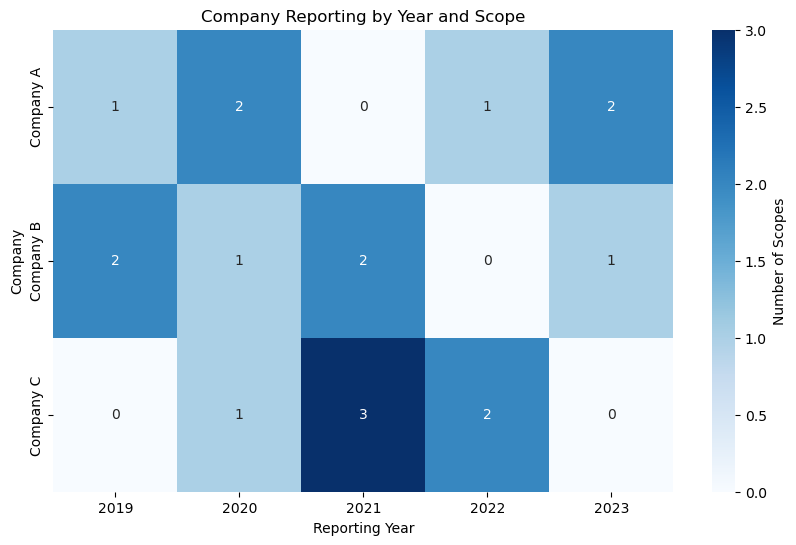

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data preparation
data = {
    'Company': ['Company A', 'Company B', 'Company C'],
    '2019': [1, 2, 0],
    '2020': [2, 1, 1],
    '2021': [0, 2, 3],
    '2022': [1, 0, 2],
    '2023': [2, 1, 0]
}

df = pd.DataFrame(data)
df.set_index('Company', inplace=True)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', cbar_kws={'label': 'Number of Scopes'})
plt.title('Company Reporting by Year and Scope')
plt.xlabel('Reporting Year')
plt.ylabel('Company')
plt.show()

/var/folders/nq/3pr9r7y53tl05ffs53l8nqfh0000gn/T/ipykernel_19279/1871406691.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df.applymap(lambda x: len(x.split(', '))), annot=heatmap_data, fmt='',


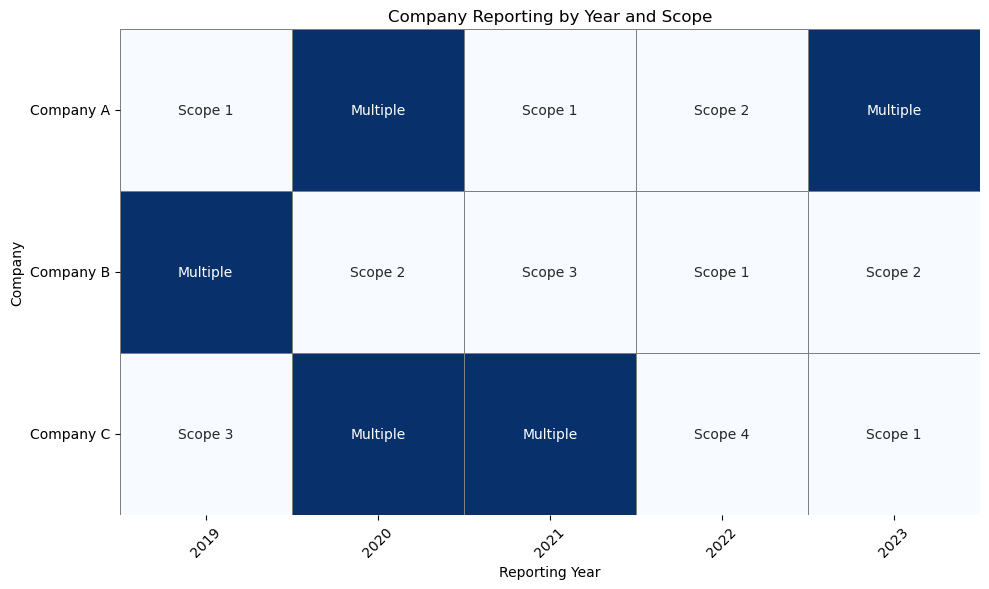

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation
data = {
    'Company': ['Company A', 'Company B', 'Company C'],
    '2019': ['Scope 1', 'Scope 1, Scope 2', 'Scope 3'],
    '2020': ['Scope 1, Scope 2', 'Scope 2', 'Scope 1, Scope 3'],
    '2021': ['Scope 1', 'Scope 3', 'Scope 1, Scope 2'],
    '2022': ['Scope 2', 'Scope 1', 'Scope 4'],
    '2023': ['Scope 1, Scope 3', 'Scope 2', 'Scope 1']
}

df = pd.DataFrame(data)
df.set_index('Company', inplace=True)

# Create a color mapping for scopes
scope_colors = {
    'Scope 1': 'lightblue',
    'Scope 2': 'lightorange',
    'Scope 3': 'lightgreen',
    'Scope 4': 'lightcoral'
}

# Create a matrix for the heatmap
heatmap_data = np.empty(df.shape, dtype=object)

for i, company in enumerate(df.index):
    for j, year in enumerate(df.columns):
        scopes = df.at[company, year].split(', ')
        # Use a blended color for multiple scopes
        if len(scopes) > 1:
            heatmap_data[i, j] = 'Multiple'
        else:
            heatmap_data[i, j] = scopes[0]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.applymap(lambda x: len(x.split(', '))), annot=heatmap_data, fmt='', 
            cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

# Set ticks and labels
plt.xticks(np.arange(len(df.columns)) + 0.5, df.columns)
plt.yticks(np.arange(len(df.index)) + 0.5, df.index)
plt.title('Company Reporting by Year and Scope')
plt.xlabel('Reporting Year')
plt.ylabel('Company')

# Adjust text size and position
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

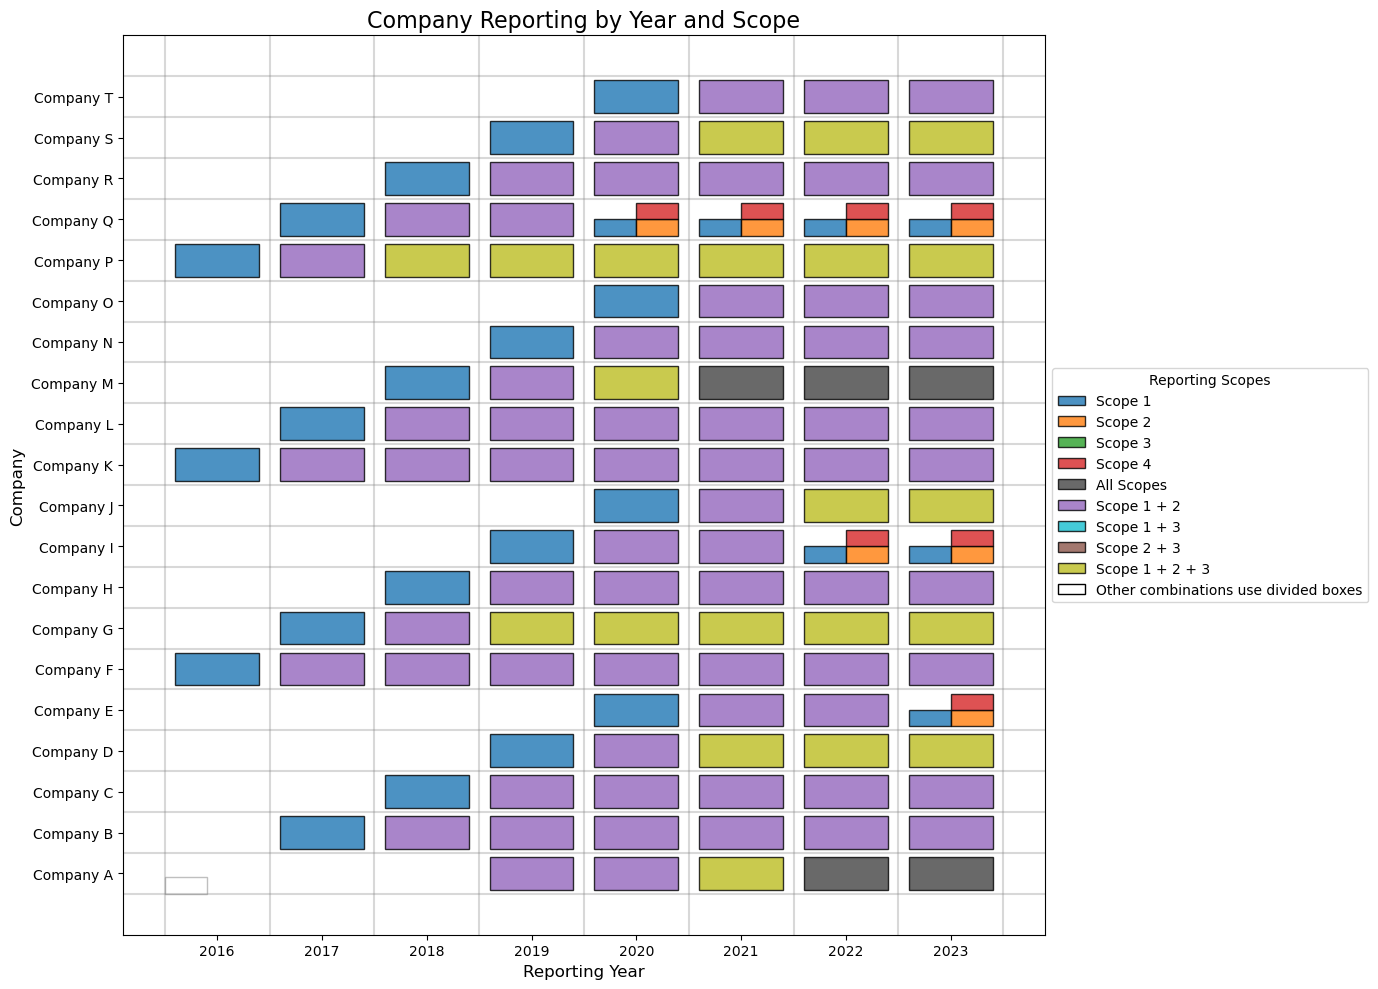

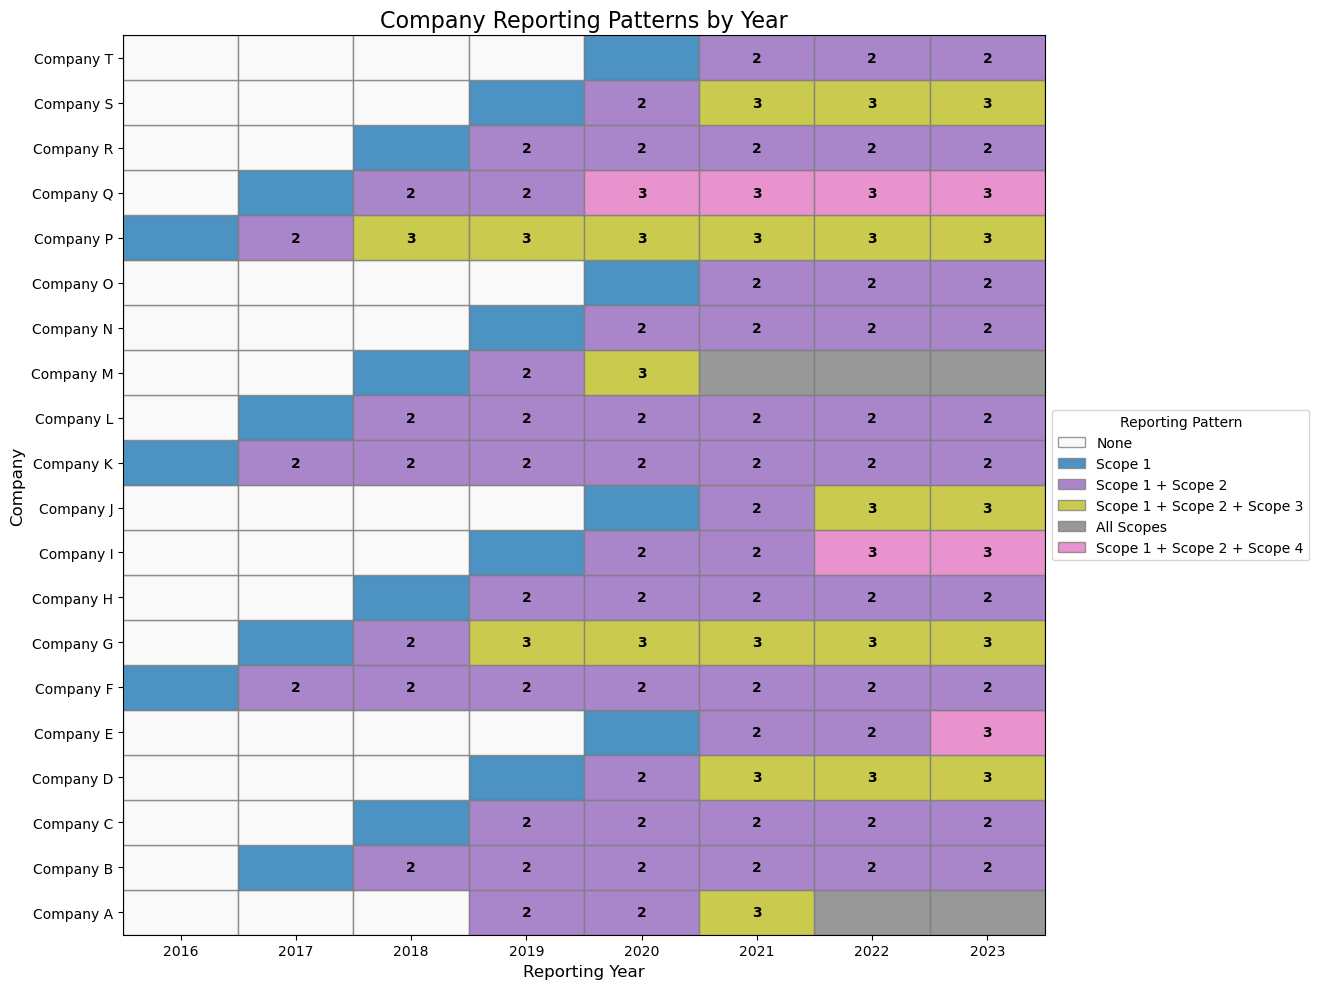

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

# Create example dataframe
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2020, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2020, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2019, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2019, "Reporting Scope": "Scope 2"},
]

# Add more company data
# Adding 19 more companies for demonstration
for i in range(1, 20):
    company_name = f"Company {chr(65+i)}"  # B through T
    start_year = 2016 + (i % 5)  # Different starting years
    
    for year in range(start_year, 2024):
        # Different scope combinations based on year
        scopes = []
        if year >= start_year:
            scopes.append("Scope 1")
        if year >= start_year + 1:
            scopes.append("Scope 2")
        if year >= start_year + 2 and i % 3 == 0:  # Some companies report Scope 3
            scopes.append("Scope 3")
        if year >= start_year + 3 and i % 4 == 0:  # Fewer companies report Scope 4
            scopes.append("Scope 4")
            
        # Add entries for this company-year-scope combination
        for scope in scopes:
            data.append({"Company": company_name, "Reporting Year": year, "Reporting Scope": scope})

# Convert to DataFrame
df = pd.DataFrame(data)

def create_colored_boxes_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Create a dictionary to store which scopes are reported for each company-year pair
    scope_data = {}
    for company in companies:
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            scope_data[(company, year)] = reported_scopes
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Define colors for each scope
    scope_colors = {
        "Scope 1": "#1f77b4",  # Blue
        "Scope 2": "#ff7f0e",  # Orange
        "Scope 3": "#2ca02c",  # Green
        "Scope 4": "#d62728",  # Red
    }
    
    # Define a color map for combinations
    # For empty cells (no reporting)
    ax.add_patch(patches.Rectangle((-0.5, -0.5), 0.4, 0.4, 
                                 facecolor='white', edgecolor='gray', alpha=0.5))
    
    # Draw grid
    for y in range(len(companies) + 1):
        ax.axhline(y=y-0.5, color='gray', linestyle='-', alpha=0.3)
    
    for x in range(len(years) + 1):
        ax.axvline(x=x-0.5, color='gray', linestyle='-', alpha=0.3)
    
    # Fill in the heatmap with colored boxes
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            reported_scopes = scope_data.get((company, year), set())
            
            # If no scopes reported, leave cell white
            if not reported_scopes:
                continue
            
            # Calculate a blended color based on reported scopes
            if len(reported_scopes) == 1:
                # Single scope - use its dedicated color
                scope = list(reported_scopes)[0]
                color = scope_colors[scope]
                ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                             facecolor=color, edgecolor='black', alpha=0.8))
            else:
                # Multiple scopes - divide the cell into quadrants
                scopes_present = [scope in reported_scopes for scope in all_scopes]
                
                # Use a standardized approach to color cells with multiple scopes
                # Sort the reported scopes for consistency
                sorted_scopes = sorted(list(reported_scopes))
                
                if len(reported_scopes) == len(all_scopes):
                    # All scopes - fill with dark gray
                    ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                                 facecolor='#444444', edgecolor='black', alpha=0.8))
                elif "Scope 1" in reported_scopes and "Scope 2" in reported_scopes and len(reported_scopes) == 2:
                    # Scope 1 + 2 - fill with purple
                    ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                                 facecolor='#9467bd', edgecolor='black', alpha=0.8))
                elif "Scope 1" in reported_scopes and "Scope 3" in reported_scopes and len(reported_scopes) == 2:
                    # Scope 1 + 3 - fill with cyan
                    ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                                 facecolor='#17becf', edgecolor='black', alpha=0.8))
                elif "Scope 2" in reported_scopes and "Scope 3" in reported_scopes and len(reported_scopes) == 2:
                    # Scope 2 + 3 - fill with brown
                    ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                                 facecolor='#8c564b', edgecolor='black', alpha=0.8))
                elif "Scope 1" in reported_scopes and "Scope 2" in reported_scopes and "Scope 3" in reported_scopes and len(reported_scopes) == 3:
                    # Scope 1 + 2 + 3 - fill with olive
                    ax.add_patch(patches.Rectangle((y_idx-0.4, c_idx-0.4), 0.8, 0.8, 
                                                 facecolor='#bcbd22', edgecolor='black', alpha=0.8))
                else:
                    # Other combinations - use boxes
                    box_size = 0.4  # Size of each box
                    positions = [
                        (y_idx-0.4, c_idx-0.4),  # Top-left (Scope 1)
                        (y_idx, c_idx-0.4),      # Top-right (Scope 2)
                        (y_idx-0.4, c_idx),      # Bottom-left (Scope 3)
                        (y_idx, c_idx),          # Bottom-right (Scope 4)
                    ]
                    
                    for i, scope in enumerate(all_scopes):
                        if scope in reported_scopes:
                            pos_x, pos_y = positions[i]
                            ax.add_patch(patches.Rectangle((pos_x, pos_y), box_size, box_size, 
                                                         facecolor=scope_colors[scope], 
                                                         edgecolor='black', alpha=0.8))
    
    # Create a legend for individual scopes
    legend_elements = [
        patches.Patch(facecolor=scope_colors[scope], edgecolor='black', 
                    alpha=0.8, label=scope)
        for scope in all_scopes
    ]
    
    # Add legend elements for common combinations
    common_combinations = [
        ("All Scopes", '#444444'),
        ("Scope 1 + 2", '#9467bd'),
        ("Scope 1 + 3", '#17becf'),
        ("Scope 2 + 3", '#8c564b'),
        ("Scope 1 + 2 + 3", '#bcbd22'),
    ]
    
    for label, color in common_combinations:
        legend_elements.append(
            patches.Patch(facecolor=color, edgecolor='black', alpha=0.8, label=label)
        )
    
    # Add a legend element for multi-colored cells
    multi_patch = patches.Patch(facecolor='white', edgecolor='black', 
                              label='Other combinations use divided boxes')
    legend_elements.append(multi_patch)
    
    # Add the legend
    ax.legend(handles=legend_elements, loc='center left', 
             bbox_to_anchor=(1, 0.5), title='Reporting Scopes')
    
    # Set ticks and labels
    ax.set_xticks(range(len(years)))
    ax.set_yticks(range(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Set labels and title
    plt.title('Company Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)
    
    return fig

# Alternative: Create a simpler heatmap with distinct colors for common combinations
def create_simplified_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Define a function to encode the reporting pattern
    def encode_pattern(scopes):
        if not scopes:
            return "None"
        
        # Sort scopes to ensure consistent encoding
        scopes = sorted(list(scopes))
        
        # Special cases for common combinations
        if set(scopes) == set(all_scopes):
            return "All Scopes"
        if len(scopes) == 1:
            return scopes[0]
        
        # For other combinations, use a + notation
        return " + ".join(scopes)
    
    # Create data for the heatmap
    heatmap_data = []
    for company in companies:
        row = []
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            pattern = encode_pattern(reported_scopes)
            row.append(pattern)
        heatmap_data.append(row)
    
    # Convert to numpy array
    heatmap_array = np.array(heatmap_data)
    
    # Get unique patterns and create color mapping
    unique_patterns = sorted(list(set(heatmap_array.flatten())))
    
    # Define colors for different patterns
    color_map = {
        "None": "#f8f8f8",        # Very light gray (almost white)
        "Scope 1": "#1f77b4",     # Blue
        "Scope 2": "#ff7f0e",     # Orange
        "Scope 3": "#2ca02c",     # Green
        "Scope 4": "#d62728",     # Red
        "Scope 1 + Scope 2": "#9467bd",       # Purple
        "Scope 1 + Scope 3": "#17becf",       # Cyan
        "Scope 2 + Scope 3": "#8c564b",       # Brown
        "Scope 1 + Scope 2 + Scope 3": "#bcbd22",  # Olive
        "All Scopes": "#7f7f7f",   # Gray
    }
    
    # Set default colors for patterns not explicitly defined
    for pattern in unique_patterns:
        if pattern not in color_map:
            # Use a light pink for other combinations
            color_map[pattern] = "#e377c2"
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Create the heatmap
    for i, company in enumerate(companies):
        for j, year in enumerate(years):
            pattern = heatmap_array[i, j]
            color = color_map[pattern]
            
            # Draw rectangle with the appropriate color
            rect = patches.Rectangle((j-0.5, i-0.5), 1, 1, 
                                  facecolor=color, edgecolor='gray', alpha=0.8)
            ax.add_patch(rect)
            
            # For complex patterns, add a small text label
            if "+" in pattern and pattern != "All Scopes":
                # Count the number of scopes
                scope_count = pattern.count("Scope")
                ax.text(j, i, f"{scope_count}", ha='center', va='center', 
                      color='black', fontweight='bold')
    
    # Create a legend
    legend_elements = [
        patches.Patch(facecolor=color, edgecolor='gray', alpha=0.8, label=pattern)
        for pattern, color in color_map.items()
        if pattern in unique_patterns  # Only include patterns that actually appear
    ]
    
    # Add the legend
    ax.legend(handles=legend_elements, loc='center left', 
             bbox_to_anchor=(1, 0.5), title='Reporting Pattern')
    
    # Set ticks and labels
    ax.set_xticks(range(len(years)))
    ax.set_yticks(range(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Set axis limits
    ax.set_xlim(-0.5, len(years) - 0.5)
    ax.set_ylim(-0.5, len(companies) - 0.5)
    
    # Set labels and title
    plt.title('Company Reporting Patterns by Year', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)
    
    return fig

# Create both visualizations
boxes_fig = create_colored_boxes_heatmap(df)
simple_fig = create_simplified_heatmap(df)

# To save
# boxes_fig.savefig('colored_boxes_heatmap.png', dpi=300, bbox_inches='tight')
# simple_fig.savefig('simplified_scope_heatmap.png', dpi=300, bbox_inches='tight')

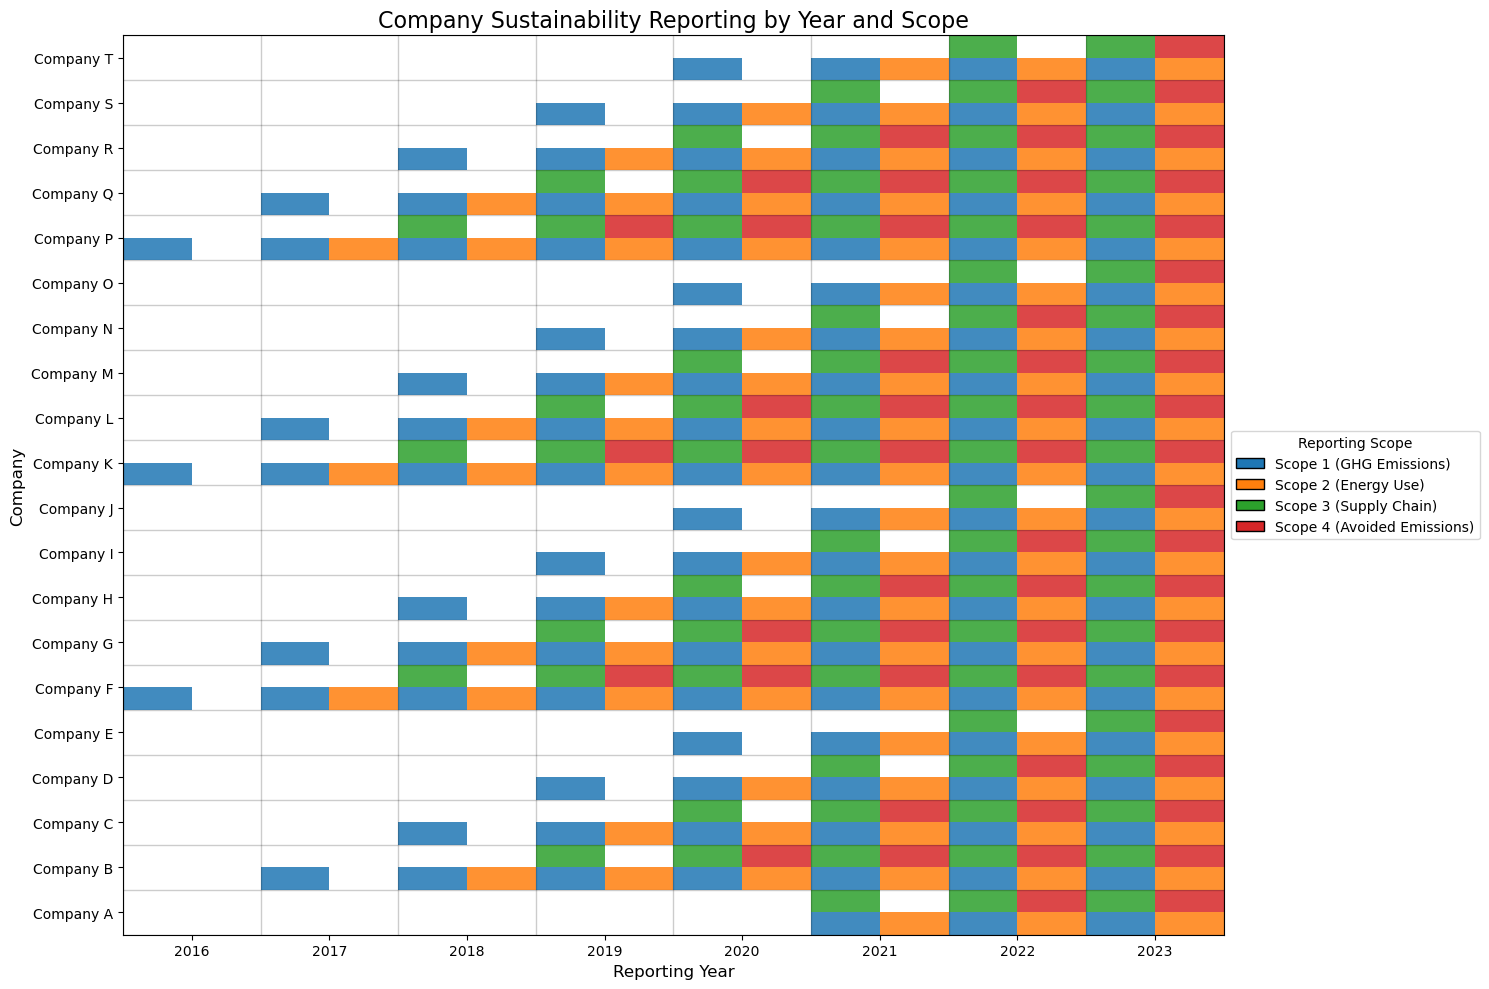

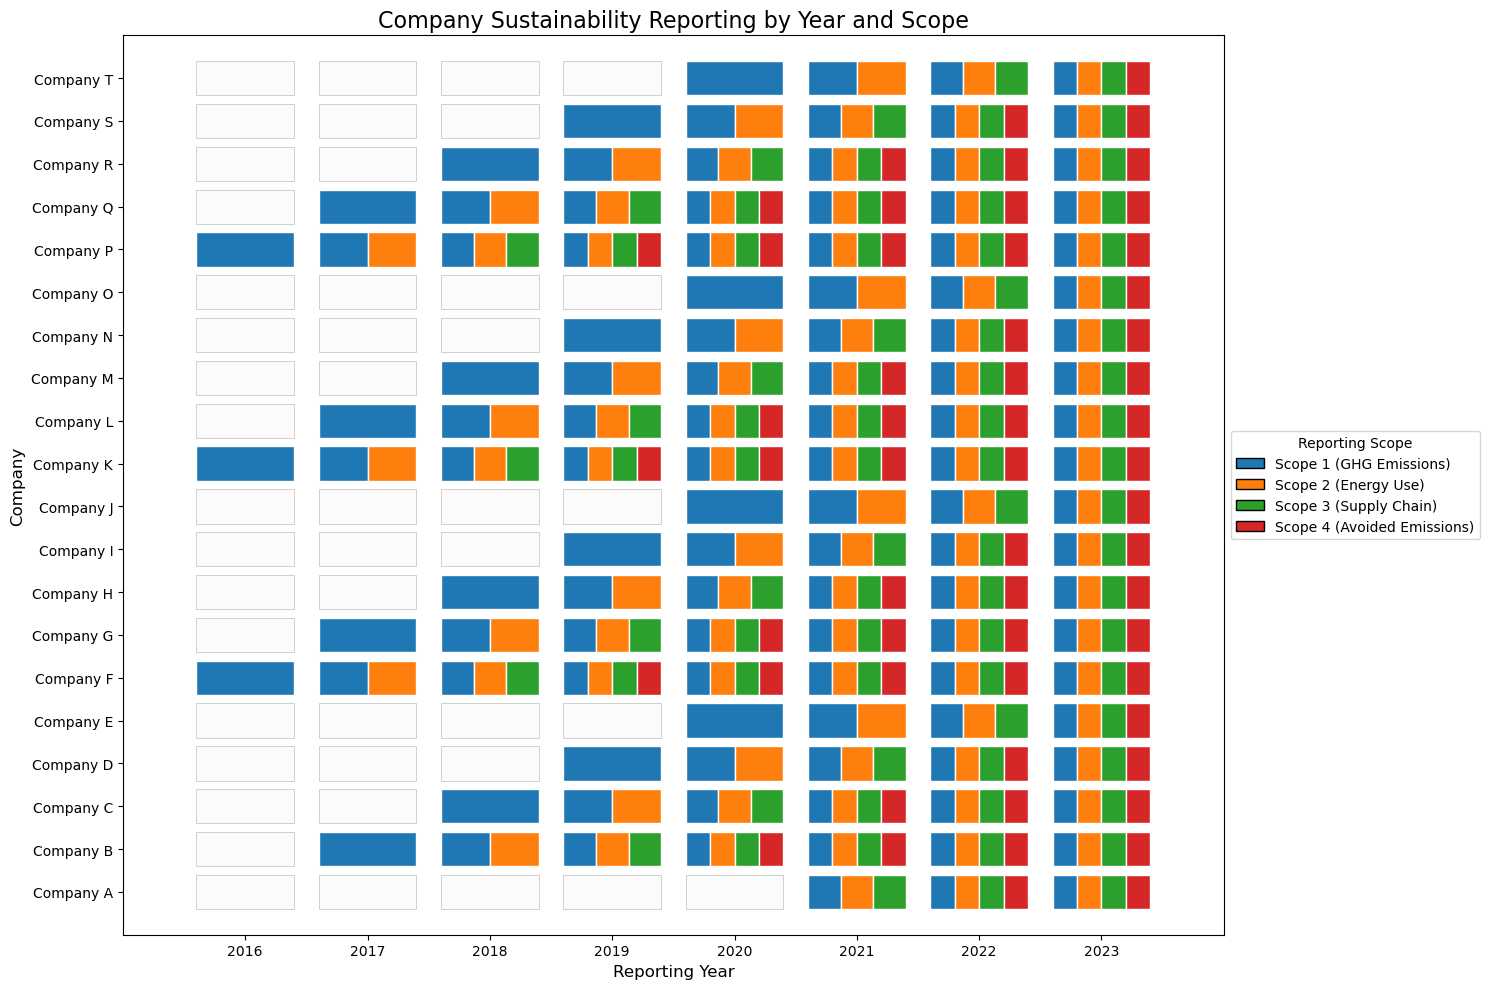

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Create example dataframe
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
]

# Add more company data
# Adding 19 more companies for demonstration
for i in range(1, 20):
    company_name = f"Company {chr(65+i)}"  # B through T
    start_year = 2016 + (i % 5)  # Different starting years
    
    for year in range(start_year, 2024):
        # Different scope combinations based on year
        scopes = []
        if year >= start_year:
            scopes.append("Scope 1")
        if year >= start_year + 1:
            scopes.append("Scope 2")
        if year >= start_year + 2:
            scopes.append("Scope 3")
        if year >= start_year + 3:
            scopes.append("Scope 4")
            
        # Add entries for this company-year-scope combination
        for scope in scopes:
            data.append({"Company": company_name, "Reporting Year": year, "Reporting Scope": scope})

# Convert to DataFrame
df = pd.DataFrame(data)

def create_quad_color_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Define scope colors - use distinct colors that are qualitatively different
    scope_colors = {
        "Scope 1": "#1f77b4",  # Blue for GHG emissions
        "Scope 2": "#ff7f0e",  # Orange for energy use
        "Scope 3": "#2ca02c",  # Green for supply chain
        "Scope 4": "#d62728",  # Red for avoided emissions
    }
    
    # Create a mapping of which scopes are reported by each company in each year
    scope_matrix = {}
    for company in companies:
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            scope_matrix[(company, year)] = reported_scopes
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot grid with white background
    for y in range(len(companies) + 1):
        ax.axhline(y=y-0.5, color='black', linestyle='-', alpha=0.2, linewidth=1)
    
    for x in range(len(years) + 1):
        ax.axvline(x=x-0.5, color='black', linestyle='-', alpha=0.2, linewidth=1)
    
    # Define quadrant positions within each cell
    quadrants = [
        (0.0, 0.0, 0.5, 0.5),  # Bottom-left (Scope 1)
        (0.5, 0.0, 0.5, 0.5),  # Bottom-right (Scope 2)
        (0.0, 0.5, 0.5, 0.5),  # Top-left (Scope 3)
        (0.5, 0.5, 0.5, 0.5),  # Top-right (Scope 4)
    ]
    
    # Fill the grid with colors for each reported scope
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            reported_scopes = scope_matrix[(company, year)]
            
            # For each scope, color its designated quadrant if reported
            for s_idx, scope in enumerate(all_scopes):
                if scope in reported_scopes:
                    # Define the quadrant position
                    x_start, y_start, width, height = quadrants[s_idx]
                    
                    # Create and add the colored rectangle for this scope
                    rect = patches.Rectangle(
                        (y_idx - 0.5 + x_start, c_idx - 0.5 + y_start), 
                        width, height, 
                        facecolor=scope_colors[scope], 
                        edgecolor='none',
                        alpha=0.85
                    )
                    ax.add_patch(rect)
    
    # Create a legend for the scopes
    legend_elements = [
        patches.Patch(facecolor=scope_colors[scope], edgecolor='black', 
                     label=f"{scope} ({['GHG Emissions', 'Energy Use', 'Supply Chain', 'Avoided Emissions'][i]})")
        for i, scope in enumerate(all_scopes)
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Scope", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Set ticks and labels
    ax.set_xticks(range(len(years)))
    ax.set_yticks(range(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Set limits so grid displays properly
    ax.set_xlim(-0.5, len(years) - 0.5)
    ax.set_ylim(-0.5, len(companies) - 0.5)
    
    # Set labels and title
    plt.title('Company Sustainability Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    plt.tight_layout()
    return plt.gcf()

# Alternative approach: Use a stacked colored grid for each company/year
def create_stacked_color_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Define scope colors
    scope_colors = {
        "Scope 1": "#1f77b4",  # Blue for GHG emissions
        "Scope 2": "#ff7f0e",  # Orange for energy use
        "Scope 3": "#2ca02c",  # Green for supply chain
        "Scope 4": "#d62728",  # Red for avoided emissions
    }
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Define the size of each cell and the gap between cells
    cell_width = 0.8
    cell_height = 0.8
    
    # Draw the background grid
    for y in range(len(companies)):
        for x in range(len(years)):
            rect = patches.Rectangle(
                (x - cell_width/2, y - cell_height/2), 
                cell_width, cell_height, 
                facecolor='#f8f8f8', 
                edgecolor='gray',
                linewidth=0.5,
                alpha=0.5
            )
            ax.add_patch(rect)
    
    # For each company and year, create a horizontally divided cell showing reported scopes
    for c_idx, company in enumerate(companies):
        for y_idx, year in enumerate(years):
            # Get reported scopes for this company and year
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = set(company_year_data['Reporting Scope'].values)
            
            # Skip if no scopes reported
            if not reported_scopes:
                continue
            
            # Count how many scopes are reported to divide the cell
            scope_count = len(reported_scopes)
            section_width = cell_width / scope_count if scope_count > 0 else 0
            
            # Sort the reported scopes to keep the order consistent
            sorted_scopes = [s for s in all_scopes if s in reported_scopes]
            
            # Draw a section for each reported scope
            for i, scope in enumerate(sorted_scopes):
                # Calculate position for this section
                x_start = y_idx - cell_width/2 + i * section_width
                
                # Create the colored rectangle
                rect = patches.Rectangle(
                    (x_start, c_idx - cell_height/2), 
                    section_width, cell_height, 
                    facecolor=scope_colors[scope], 
                    edgecolor='white',
                    linewidth=1
                )
                ax.add_patch(rect)
    
    # Create a legend for the scopes
    legend_elements = [
        patches.Patch(facecolor=scope_colors[scope], edgecolor='black', 
                     label=f"{scope} ({['GHG Emissions', 'Energy Use', 'Supply Chain', 'Avoided Emissions'][i]})")
        for i, scope in enumerate(all_scopes)
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Scope", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Set ticks and labels
    ax.set_xticks(range(len(years)))
    ax.set_yticks(range(len(companies)))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Set limits with some padding
    ax.set_xlim(-1, len(years))
    ax.set_ylim(-1, len(companies))
    
    # Set labels and title
    plt.title('Company Sustainability Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    plt.tight_layout()
    return plt.gcf()

# Create both visualizations
quad_heatmap = create_quad_color_heatmap(df)
stacked_heatmap = create_stacked_color_heatmap(df)

# To save
# quad_heatmap.savefig('quad_heatmap.png', dpi=300, bbox_inches='tight')
# stacked_heatmap.savefig('stacked_heatmap.png', dpi=300, bbox_inches='tight')

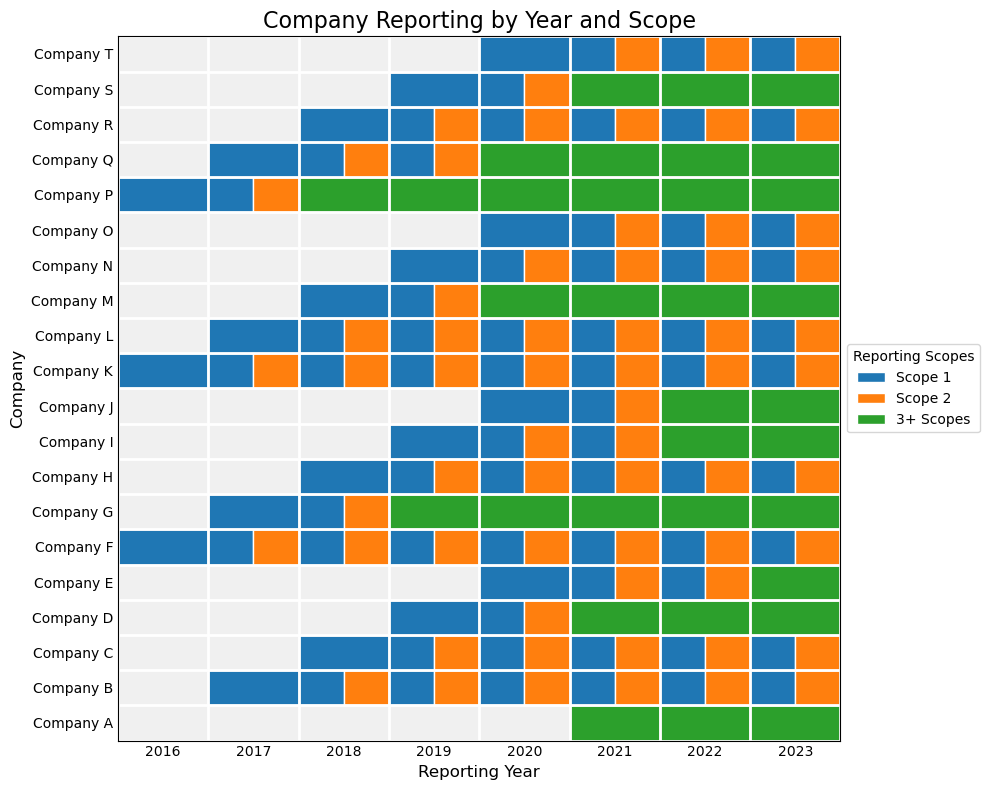

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create example dataframe
data = [
    # Company A
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2023, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 3"},
    {"Company": "Company A", "Reporting Year": 2022, "Reporting Scope": "Scope 4"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 1"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 2"},
    {"Company": "Company A", "Reporting Year": 2021, "Reporting Scope": "Scope 3"},
]

# Add more company data
# Adding 19 more companies for demonstration
for i in range(1, 20):
    company_name = f"Company {chr(65+i)}"  # B through T
    start_year = 2016 + (i % 5)  # Different starting years
    
    for year in range(start_year, 2024):
        # Different scope combinations based on year and company
        scopes = []
        if year >= start_year:
            scopes.append("Scope 1")
        if year >= start_year + 1:
            scopes.append("Scope 2")
        if year >= start_year + 2 and i % 3 == 0:  # Only some companies report Scope 3
            scopes.append("Scope 3")
        if year >= start_year + 3 and i % 4 == 0:  # Even fewer report Scope 4
            scopes.append("Scope 4")
            
        # Add entries for this company-year-scope combination
        for scope in scopes:
            data.append({"Company": company_name, "Reporting Year": year, "Reporting Scope": scope})

# Convert to DataFrame
df = pd.DataFrame(data)

def create_stacked_heatmap(df):
    # Get unique companies, years, and scopes
    companies = sorted(df['Company'].unique())
    years = sorted(df['Reporting Year'].unique())
    all_scopes = ["Scope 1", "Scope 2", "Scope 3", "Scope 4"]
    
    # Calculate how many scopes each company reports each year
    scope_counts = {}
    scope_data = {}
    for company in companies:
        for year in years:
            company_year_data = df[(df['Company'] == company) & (df['Reporting Year'] == year)]
            reported_scopes = list(company_year_data['Reporting Scope'].values)
            
            # Store the count of scopes and the actual scopes
            scope_counts[(company, year)] = len(reported_scopes)
            scope_data[(company, year)] = reported_scopes
    
    # Define colors for scopes and special colors
    scope_colors = {
        "Scope 1": "#1f77b4",  # Blue
        "Scope 2": "#ff7f0e",  # Orange
        "Scope 3": "#9467bd",  # Green
        "Scope 4": "#d62728",  # Red
        "3+ Scopes": "#2ca02c"  # Purple for 3+ scopes
    }
    
    # Define the figure size based on number of companies and years
    fig_width = max(10, len(years) * 0.6)
    fig_height = max(8, len(companies) * 0.4)
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    
    # Set background to light gray
    ax.set_facecolor('#f0f0f0')
    
    # Draw the grid of cells
    for i, company in enumerate(companies):
        for j, year in enumerate(years):
            # Cell coordinates
            x0, y0 = j, i
            width, height = 1, 1
            
            # Background rectangle for the cell (light gray or white)
            if scope_counts[(company, year)] == 0:
                # No reporting - light gray
                rect = patches.Rectangle((x0, y0), width, height, 
                                       facecolor='#f0f0f0', 
                                       edgecolor='white',
                                       linewidth=1)
                ax.add_patch(rect)
            else:
                # Some reporting - white background
                rect = patches.Rectangle((x0, y0), width, height, 
                                       facecolor='white', 
                                       edgecolor='white',
                                       linewidth=1)
                ax.add_patch(rect)
                
                # Handle special case: 3+ scopes
                if scope_counts[(company, year)] >= 3:
                    # Draw a single rectangle for 3+ scopes
                    rect = patches.Rectangle((x0, y0), width, height, 
                                           facecolor=scope_colors["3+ Scopes"], 
                                           edgecolor='white',
                                           linewidth=1)
                    ax.add_patch(rect)
                else:
                    # Draw stacked horizontal sections for each scope (1 or 2)
                    reported = scope_data[(company, year)]
                    section_width = width / len(reported)
                    
                    for k, scope in enumerate(reported):
                        rect = patches.Rectangle((x0 + k * section_width, y0), 
                                               section_width, height, 
                                               facecolor=scope_colors[scope], 
                                               edgecolor='white',
                                               linewidth=1)
                        ax.add_patch(rect)
    
    # Set the limits
    ax.set_xlim(0, len(years))
    ax.set_ylim(0, len(companies))
    
    # Set ticks and labels
    ax.set_xticks(np.arange(0.5, len(years) + 0.5))
    ax.set_yticks(np.arange(0.5, len(companies) + 0.5))
    ax.set_xticklabels(years)
    ax.set_yticklabels(companies)
    
    # Center the ticks
    ax.tick_params(axis='both', which='both', length=0)
    
    # Add gridlines
    ax.set_xticks(np.arange(0, len(years) + 1, 1), minor=True)
    ax.set_yticks(np.arange(0, len(companies) + 1, 1), minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=2)
    
    # Create a legend
    legend_elements = [
        patches.Patch(facecolor=scope_colors["Scope 1"], edgecolor='white', label='Scope 1'),
        patches.Patch(facecolor=scope_colors["Scope 2"], edgecolor='white', label='Scope 2'),
        patches.Patch(facecolor=scope_colors["3+ Scopes"], edgecolor='white', label='3+ Scopes')
    ]
    
    ax.legend(handles=legend_elements, title="Reporting Scopes", 
             loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Set labels and title
    plt.title('Company Reporting by Year and Scope', fontsize=16)
    plt.xlabel('Reporting Year', fontsize=12)
    plt.ylabel('Company', fontsize=12)
    
    plt.tight_layout()
    return fig

# Create the visualization
stacked_heatmap = create_stacked_heatmap(df)

# Uncomment to save
# stacked_heatmap.savefig('stacked_scope_heatmap.png', dpi=300, bbox_inches='tight')